<a href="https://colab.research.google.com/github/AbernalV/SyS/blob/main/AlejandroBV_Ejercicio_ejemplo_1SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SISTEMA DE ADQUISICION***



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

$$x[t_k] = 8 \cos(100t) + 10\sin(20t) - 7\cos(300t - π/7)$$

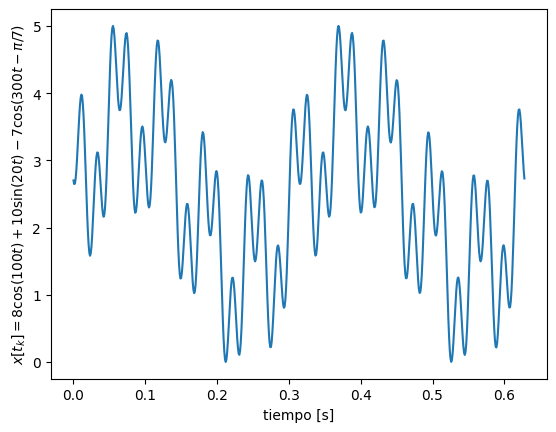

In [25]:
ti = 0 #tiempo inicial
tf = 2*np.pi/10 #tiempo final
tv = np.arange(ti,tf,0.001)#procesar dos periodos discretizados
y = 8*np.cos(100*tv) + 10*np.sin(20*tv) - 7*np.cos(300*tv - np.pi/7)

ycs = my_ceropen(y, ymin=0,ymax=5)

plt.plot(tv,ycs)
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k] = 8 \cos(100t) + 10\sin(20t) - 7\cos(300t - π/7)$')
plt.show()

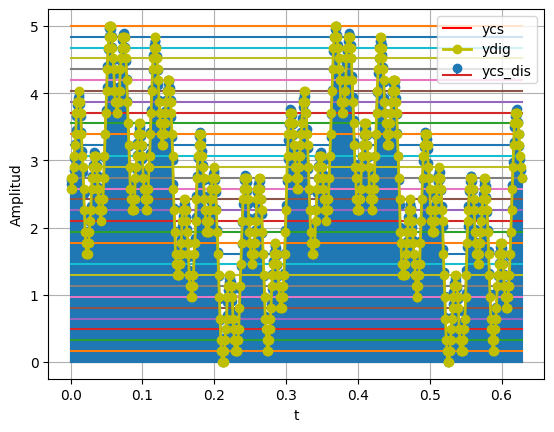

In [24]:
#número de bits y vector de cuantización
nbits = 5
rmin = 0
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve))

#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()